In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/CI for PD")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import linalg as la
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm, trange
from numba import jit, njit
try:
    import multiprocess
except:
    import multiprocessing as multiprocess
import warnings
warnings.filterwarnings('ignore')

In [4]:
initial_states = ["AAA", "AA+", "AA", "AA-", "A+", "A", "A-", "BBB+",
                     "BBB", "BBB-", "BB+", "BB", "BB-", "B+", "B", "B-",
                     "CCC+", "CCC", "CCC-", "CC", "Default"]

final_states = ["AAA", "AA+", "AA", "AA-", "A+", "A", "A-", "BBB+",
                    "BBB", "BBB-", "BB+", "BB", "BB-", "B+", "B", "B-",
                    "CCC+", "CCC", "CCC-", "CC", "Default", "NR"]

In [5]:
sorted(os.listdir("Data/pds_raw_ratings"))

['pds_2011.csv',
 'pds_2012.csv',
 'pds_2013.csv',
 'pds_2014.csv',
 'pds_2015.csv',
 'pds_2016.csv',
 'pds_2017.csv',
 'pds_2018.csv',
 'pds_2019.csv',
 'pds_2020.csv',
 'pds_2021.csv']

In [6]:
pds = [pd.read_csv(f"Data/pds_raw_ratings/{f}") for f in sorted(os.listdir("Data/pds_raw_ratings"))]

In [7]:
pds_all = pd.concat(pds, axis=1)

In [8]:
pds_all

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2,9.408179e-20,1.660059e-09,0.000000e+00,2.561287e-19,3.144121e-14,0.000000e+00,0.000000e+00,0.000000e+00,1.046639e-14,0.000000e+00,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
4,1.521185e-17,0.000000e+00,0.000000e+00,0.000000e+00,1.956363e-17,9.082237e-18,0.000000e+00,5.891748e-21,5.222139e-21,0.000000e+00,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
5,3.627366e-15,2.532321e-10,0.000000e+00,3.904568e-14,5.136885e-15,4.088253e-15,4.266449e-09,1.457161e-18,2.551505e-18,0.000000e+00,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
6,2.478633e-14,1.975526e-10,0.000000e+00,1.267654e-11,0.000000e+00,2.904575e-12,1.377666e-08,2.116011e-18,1.020662e-15,2.639698e-12,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
7,2.445596e-12,1.228349e-07,0.000000e+00,2.932786e-17,3.798382e-12,8.591679e-15,1.994371e-06,1.277299e-15,5.418283e-13,2.238906e-12,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
8,2.352169e-09,2.816312e-10,0.000000e+00,9.835423e-15,8.708319e-10,4.315498e-12,2.124239e-09,7.391171e-13,1.544746e-15,1.662235e-15,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
9,1.621374e-11,2.377965e-09,0.000000e+00,1.145644e-08,1.728057e-12,2.478764e-09,3.088638e-09,4.586364e-10,5.129409e-10,2.266565e-09,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


In [9]:
pds[0].dropna(axis=1).quantile(q=[0.025, 0.975], axis=1).T*10000

,0.025,0.975
0,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00
2,0.000000e+00,1.088340e-08
3,0.000000e+00,4.012687e-15
4,0.000000e+00,1.096603e-09
5,0.000000e+00,3.016494e-06
6,0.000000e+00,2.671515e-06
7,0.000000e+00,1.231389e-03
8,0.000000e+00,2.997787e-04
9,0.000000e+00,5.319983e-04


In [10]:
(pds_all[pds_all.sum(axis=0)[pds_all.sum(axis=0)!=0].index.tolist()].dropna(axis=1).quantile(q=[0.025, 0.975], axis=1).T*10000)

,0.025,0.975
0,0.000000,0.000000e+00
1,0.000000,0.000000e+00
2,0.000000,1.647575e-21
3,0.000000,1.936535e-10
4,0.000000,7.059229e-08
5,0.000000,1.800093e-05
6,0.000000,6.761558e-04
7,0.000000,3.294993e-03
8,0.000000,1.381006e-02
9,0.000000,1.385547e+00


In [11]:
non_param_ci = pd.concat([pds_all.dropna(axis=1).mean(axis=1), pds_all.dropna(axis=1).quantile(q=[0.025, 0.975], axis=1).T], axis=1)*10000
non_param_ci.columns = ["PD", "Lower", "Upper"]
non_param_ci.index = final_states
non_param_ci.drop(["Default", "NR"], axis=0, inplace=True)
non_param_ci

,PD,Lower,Upper
AAA,6.043171e-14,0.0,0.000000e+00
AA+,2.226557e-12,0.0,0.000000e+00
AA,2.335120e-08,0.0,1.377348e-21
AA-,7.167092e-09,0.0,1.930951e-10
A+,1.284084e-06,0.0,7.026576e-08
A,1.748886e-05,0.0,1.782727e-05
A-,1.362459e-03,0.0,6.314620e-04
BBB+,2.262225e-03,0.0,3.280336e-03
BBB,5.615497e-03,0.0,1.330158e-02
BBB-,9.871299e-02,0.0,1.437530e+00


In [12]:
mean_estimates_of_pds = pd.concat([pd[pd.sum(axis=0)[pd.sum(axis=0)!=0].index.tolist()].dropna(axis=1).mean(axis=1) for pd in pds], axis=1)

mean_estimates_of_pds.columns = range(2011, 2022)

mean_estimates_of_pds.index = final_states

mean_estimates_of_pds.drop(["Default", "NR"], axis=0, inplace=True)

mean_estimates_of_pds

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
AAA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.834681e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
AA+,0.000000e+00,0.000000e+00,1.051360e-23,0.000000e+00,0.000000e+00,2.149740e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
AA,2.254528e-11,0.000000e+00,2.482648e-22,3.178772e-16,8.243219e-19,0.000000e+00,0.000000e+00,0.000000e+00,5.461952e-27,0.000000e+00,0.000000e+00
AA-,1.565702e-16,4.052882e-14,5.954406e-20,4.203507e-14,1.018643e-16,2.381144e-13,2.040823e-16,0.000000e+00,6.526869e-19,8.743254e-12,0.000000e+00
A+,9.065479e-14,1.211307e-09,1.090106e-14,1.032475e-11,2.767514e-14,5.365915e-11,3.195094e-14,0.000000e+00,4.099695e-14,9.207303e-12,0.000000e+00
A,4.186059e-11,2.756172e-09,2.584730e-10,9.344480e-09,1.769012e-11,1.636498e-09,4.210072e-12,3.384083e-14,2.725908e-13,4.186932e-09,0.000000e+00
A-,9.017973e-11,1.587710e-08,3.148053e-09,6.108724e-12,3.058625e-11,4.236942e-08,2.555850e-12,3.153099e-14,8.901050e-12,1.661645e-06,0.000000e+00
BBB+,1.861481e-08,1.800844e-06,3.341517e-07,1.007945e-11,7.716473e-09,6.285054e-08,8.592622e-10,9.355180e-12,5.266934e-11,3.814446e-08,0.000000e+00
BBB,2.823515e-09,5.584618e-07,3.475435e-07,3.788704e-10,4.852354e-08,2.431477e-07,7.686804e-07,6.541669e-09,9.544125e-09,4.596348e-06,6.026310e-14
BBB-,4.710696e-09,1.735324e-08,9.112323e-09,1.832527e-08,4.399225e-06,7.515471e-05,2.213353e-06,2.118172e-06,1.855260e-06,1.393027e-05,1.456480e-10


In [13]:
pds_all.columns = [f"Sim_{i}" for i in range(pds_all.shape[1])]

pds_all_cleaned = pds_all[pds_all.sum(axis=0)[pds_all.sum(axis=0)!=0].index.tolist()].dropna(axis=1)

pds_all_cleaned.index = final_states

pds_all_cleaned.columns = [f"Sim_{i}" for i in range(pds_all_cleaned.shape[1])]

pds_all_cleaned.drop(["Default", "NR"], axis=0, inplace=True)

pds_all_cleaned

,Sim_0,Sim_1,Sim_2,Sim_3,Sim_4,Sim_5,Sim_6,Sim_7,Sim_8,Sim_9,...,Sim_1921,Sim_1922,Sim_1923,Sim_1924,Sim_1925,Sim_1926,Sim_1927,Sim_1928,Sim_1929,Sim_1930
AAA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AA+,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AA,9.408179e-20,1.660059e-09,0.000000e+00,2.561287e-19,3.144121e-14,0.000000e+00,0.000000e+00,0.000000e+00,1.046639e-14,0.000000e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AA-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
A+,1.521185e-17,0.000000e+00,0.000000e+00,0.000000e+00,1.956363e-17,9.082237e-18,0.000000e+00,5.891748e-21,5.222139e-21,0.000000e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
A,3.627366e-15,2.532321e-10,0.000000e+00,3.904568e-14,5.136885e-15,4.088253e-15,4.266449e-09,1.457161e-18,2.551505e-18,0.000000e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
A-,2.478633e-14,1.975526e-10,0.000000e+00,1.267654e-11,0.000000e+00,2.904575e-12,1.377666e-08,2.116011e-18,1.020662e-15,2.639698e-12,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
BBB+,2.445596e-12,1.228349e-07,0.000000e+00,2.932786e-17,3.798382e-12,8.591679e-15,1.994371e-06,1.277299e-15,5.418283e-13,2.238906e-12,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
BBB,2.352169e-09,2.816312e-10,0.000000e+00,9.835423e-15,8.708319e-10,4.315498e-12,2.124239e-09,7.391171e-13,1.544746e-15,1.662235e-15,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
BBB-,1.621374e-11,2.377965e-09,0.000000e+00,1.145644e-08,1.728057e-12,2.478764e-09,3.088638e-09,4.586364e-10,5.129409e-10,2.266565e-09,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [14]:
pds_all_cleaned = pds_all_cleaned[pds_all_cleaned.sum(axis=0)[pds_all_cleaned.sum(axis=0) != 0].index.tolist()]

<Axes: ylabel='Density'>

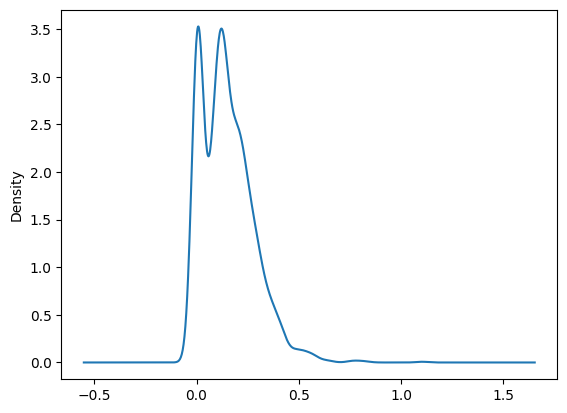

In [15]:
pds_all_cleaned.T["CCC"].plot(kind="density")

In [16]:
(pds_all_cleaned<0).sum()[(pds_all_cleaned<0).sum()!=0]

Sim_514    1
dtype: int64

In [17]:
pds_all_cleaned.sum(axis=0)[pds_all_cleaned.sum(axis=0) == 0]

Series([], dtype: float64)

In [18]:
pds_all_cleaned.mean(axis=1)

AAA     6.119225e-18
AA+     2.254578e-16
AA      2.364508e-12
AA-     7.257292e-13
A+      1.300244e-10
A       1.770896e-09
A-      1.379606e-07
BBB+    2.290695e-07
BBB     5.686169e-07
BBB-    9.995531e-06
BB+     1.459199e-04
BB      2.589133e-04
BB-     1.223881e-03
B+      2.496969e-03
B       3.057683e-03
B-      1.519842e-02
CCC+    7.367658e-02
CCC     1.502714e-01
CCC-    3.479606e-01
CC      7.538050e-01
dtype: float64

In [ ]:
(pds_all_cleaned.quantile(axis=1, q=[0.025, 0.975]).T*10000).roun

,0.025,0.975
AAA,0.0,0.000000e+00
AA+,0.0,0.000000e+00
AA,0.0,3.556747e-25
AA-,0.0,1.935824e-14
A+,0.0,7.317169e-12
A,0.0,1.802833e-09
A-,0.0,7.389865e-08
BBB+,0.0,3.348011e-07
BBB,0.0,1.349178e-06
BBB-,0.0,1.456197e-04


# Monotonicity

## 2011-2021 Monotonicity

In [ ]:
pds_all_cleaned

,Sim_0,Sim_1,Sim_2,Sim_3,Sim_4,Sim_5,Sim_6,Sim_7,Sim_8,Sim_9,...,Sim_1919,Sim_1920,Sim_1921,Sim_1922,Sim_1923,Sim_1925,Sim_1926,Sim_1928,Sim_1929,Sim_1930
AAA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AA+,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AA,9.408179e-20,1.660059e-09,0.000000e+00,2.561287e-19,3.144121e-14,0.000000e+00,0.000000e+00,0.000000e+00,1.046639e-14,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AA-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A+,1.521185e-17,0.000000e+00,0.000000e+00,0.000000e+00,1.956363e-17,9.082237e-18,0.000000e+00,5.891748e-21,5.222139e-21,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A,3.627366e-15,2.532321e-10,0.000000e+00,3.904568e-14,5.136885e-15,4.088253e-15,4.266449e-09,1.457161e-18,2.551505e-18,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A-,2.478633e-14,1.975526e-10,0.000000e+00,1.267654e-11,0.000000e+00,2.904575e-12,1.377666e-08,2.116011e-18,1.020662e-15,2.639698e-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BBB+,2.445596e-12,1.228349e-07,0.000000e+00,2.932786e-17,3.798382e-12,8.591679e-15,1.994371e-06,1.277299e-15,5.418283e-13,2.238906e-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BBB,2.352169e-09,2.816312e-10,0.000000e+00,9.835423e-15,8.708319e-10,4.315498e-12,2.124239e-09,7.391171e-13,1.544746e-15,1.662235e-15,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BBB-,1.621374e-11,2.377965e-09,0.000000e+00,1.145644e-08,1.728057e-12,2.478764e-09,3.088638e-09,4.586364e-10,5.129409e-10,2.266565e-09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
pds_all_cleaned.T["AAA"]

Sim_0       0.0
Sim_1       0.0
Sim_2       0.0
Sim_3       0.0
Sim_4       0.0
           ... 
Sim_1925    0.0
Sim_1926    0.0
Sim_1928    0.0
Sim_1929    0.0
Sim_1930    0.0
Name: AAA, Length: 1907, dtype: float64

In [ ]:
stats.ttest_ind(pds_all_cleaned.T["AAA"], pds_all_cleaned.T["AA+"], alternative="less", nan_policy="omit")

TtestResult(statistic=-1.0137807415798066, pvalue=0.1553758635748865, df=3812.0)

In [ ]:
result = pd.DataFrame(columns=["statistic", "p-value", "df"])
indices = []
for i, state in enumerate(pds_all_cleaned.index.unique()):
  for j, state2 in enumerate(pds_all_cleaned.index.unique()):
    if j-i==1:
      indices.append(f"{state2} minus {state}")
      test_res = stats.ttest_ind(pds_all_cleaned.T[state], pds_all_cleaned.T[state2], alternative="less",
                                 nan_policy="omit",
                                 equal_var= pds_all_cleaned.T[state].std()==pds_all_cleaned.T[state2].std()
                                 )
      result = result.append({"statistic": test_res.statistic,
                            "p-value": test_res.pvalue,
                            "df": test_res.df
                        }, ignore_index=True)

In [ ]:
def add_significance(pvalue):
  if pvalue <=0.01:
    return "**"
  if pvalue <= 0.05:
    return "*"
  else:
    return ""

In [ ]:
result.index = indices
result["significance"] = result["p-value"].apply(add_significance)
result["p-value"] = result["p-value"]*100
result.round(3)

,statistic,p-value,df,significance
AA+ minus AAA,-1.014,15.541,1909.051,
AA minus AA+,-1.413,7.887,1906.000,
AA- minus AA,0.911,81.879,2488.071,
A+ minus AA-,-1.516,6.485,1906.229,
A minus A+,-2.414,0.794,1966.951,**
A- minus A,-1.810,3.519,1906.306,*
BBB+ minus A-,-0.951,17.076,3614.442,
BBB minus BBB+,-2.247,1.236,2577.212,*
BBB- minus BBB,-8.319,0.000,1964.215,**
BB+ minus BBB-,-2.875,0.204,1908.157,**


## Expansion Years

In [ ]:
range(len(pds))

range(0, 11)

In [ ]:
pds_expansion = pd.concat([pds[i] for i in [0, 1,2, 3,4,5, 6,7, 8, 10]], axis=1)

In [ ]:
pds_expansion.columns = [f"Sim_{i}" for i in range(pds_expansion.shape[1])]

pds_expansion_cleaned = pds_expansion[pds_expansion.sum(axis=0)[pds_expansion.sum(axis=0)!=0].index.tolist()].dropna(axis=1)

pds_expansion_cleaned.index = final_states

pds_expansion_cleaned.columns = [f"Sim_{i}" for i in range(pds_expansion_cleaned.shape[1])]

pds_expansion_cleaned.drop(["Default", "NR"], axis=0, inplace=True)

pds_expansion_cleaned

,Sim_0,Sim_1,Sim_2,Sim_3,Sim_4,Sim_5,Sim_6,Sim_7,Sim_8,Sim_9,...,Sim_1770,Sim_1771,Sim_1772,Sim_1773,Sim_1774,Sim_1775,Sim_1776,Sim_1777,Sim_1778,Sim_1779
AAA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AA+,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AA,9.408179e-20,1.660059e-09,0.000000e+00,2.561287e-19,3.144121e-14,0.000000e+00,0.000000e+00,0.000000e+00,1.046639e-14,0.000000e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AA-,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
A+,1.521185e-17,0.000000e+00,0.000000e+00,0.000000e+00,1.956363e-17,9.082237e-18,0.000000e+00,5.891748e-21,5.222139e-21,0.000000e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
A,3.627366e-15,2.532321e-10,0.000000e+00,3.904568e-14,5.136885e-15,4.088253e-15,4.266449e-09,1.457161e-18,2.551505e-18,0.000000e+00,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
A-,2.478633e-14,1.975526e-10,0.000000e+00,1.267654e-11,0.000000e+00,2.904575e-12,1.377666e-08,2.116011e-18,1.020662e-15,2.639698e-12,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
BBB+,2.445596e-12,1.228349e-07,0.000000e+00,2.932786e-17,3.798382e-12,8.591679e-15,1.994371e-06,1.277299e-15,5.418283e-13,2.238906e-12,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
BBB,2.352169e-09,2.816312e-10,0.000000e+00,9.835423e-15,8.708319e-10,4.315498e-12,2.124239e-09,7.391171e-13,1.544746e-15,1.662235e-15,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
BBB-,1.621374e-11,2.377965e-09,0.000000e+00,1.145644e-08,1.728057e-12,2.478764e-09,3.088638e-09,4.586364e-10,5.129409e-10,2.266565e-09,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [ ]:
pds_expansion_cleaned = pds_expansion_cleaned[pds_expansion_cleaned.sum(axis=0)[pds_expansion_cleaned.sum(axis=0) != 0].index.tolist()]

In [ ]:
result_expansion = pd.DataFrame(columns=["statistic", "p-value", "df"])
indices = []
for i, state in enumerate(pds_expansion_cleaned.index.unique()):
  for j, state2 in enumerate(pds_expansion_cleaned.index.unique()):
    if j-i==1:
      indices.append(f"{state2} minus {state}")
      test_res = stats.ttest_ind(pds_expansion_cleaned.T[state], pds_expansion_cleaned.T[state2], alternative="less",
                                 nan_policy="omit",
                                 equal_var= pds_expansion_cleaned.T[state].std()==pds_expansion_cleaned.T[state2].std()
                                 )
      result_expansion = result_expansion.append({"statistic": test_res.statistic,
                            "p-value": test_res.pvalue,
                            "df": test_res.df
                        }, ignore_index=True)

In [ ]:
result_expansion.index = indices
result_expansion["significance"] = result_expansion["p-value"].apply(add_significance)
result_expansion["p-value"] = result_expansion["p-value"]*100
result_expansion.round(3)

,statistic,p-value,df,significance
AA+ minus AAA,-1.014,15.541,1757.809,
AA minus AA+,-1.413,7.887,1755.000,
AA- minus AA,1.393,91.817,1755.194,
A+ minus AA-,-1.516,6.490,1755.000,
A minus A+,-2.079,1.887,1820.487,*
A- minus A,-3.770,0.008,2699.863,**
BBB+ minus A-,-3.706,0.011,1756.334,**
BBB minus BBB+,0.272,60.725,3444.371,
BBB- minus BBB,-7.943,0.000,1762.819,**
BB+ minus BBB-,1.793,96.346,3216.799,


## Recession Years

In [ ]:
pds_recession = pds[9]

In [ ]:
pds_recession.columns = [f"Sim_{i}" for i in range(pds_recession.shape[1])]

pds_recession_cleaned = pds_recession[pds_recession.sum(axis=0)[pds_recession.sum(axis=0)!=0].index.tolist()].dropna(axis=1)

pds_recession_cleaned.index = final_states

pds_recession_cleaned.columns = [f"Sim_{i}" for i in range(pds_recession_cleaned.shape[1])]

pds_recession_cleaned.drop(["Default", "NR"], axis=0, inplace=True)

pds_recession_cleaned

,Sim_0,Sim_1,Sim_2,Sim_3,Sim_4,Sim_5,Sim_6,Sim_7,Sim_8,Sim_9,...,Sim_141,Sim_142,Sim_143,Sim_144,Sim_145,Sim_146,Sim_147,Sim_148,Sim_149,Sim_150
AAA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
AA+,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
AA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
AA-,0.000000e+00,0.000000e+00,1.089205e-11,0.000000e+00,0.000000e+00,2.188651e-15,0.000000e+00,1.396261e-15,0.000000e+00,0.000000e+00,...,8.418488e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.970115e-14,0.000000e+00,4.870594e-16,0.000000e+00,7.408351e-16
A+,0.000000e+00,0.000000e+00,4.064342e-10,0.000000e+00,0.000000e+00,0.000000e+00,1.660152e-18,1.226025e-13,5.436175e-16,0.000000e+00,...,9.988684e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.367826e-14,0.000000e+00,5.900094e-14,0.000000e+00,4.469260e-14
A,0.000000e+00,0.000000e+00,2.533259e-08,0.000000e+00,0.000000e+00,2.204287e-13,3.543074e-16,1.553335e-11,3.970763e-14,0.000000e+00,...,1.858821e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,6.050664e-12,0.000000e+00,3.779560e-12,8.121849e-19,5.112248e-12
A-,2.876393e-12,4.641517e-09,2.290257e-06,3.551939e-12,0.000000e+00,1.682520e-13,3.628538e-14,5.402247e-11,1.009875e-11,3.401520e-17,...,2.788871e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.234834e-12,0.000000e+00,1.528547e-12,0.000000e+00,4.339667e-12
BBB+,1.421152e-09,1.535217e-06,0.000000e+00,1.823884e-09,0.000000e+00,5.312849e-11,5.317775e-12,3.649702e-09,0.000000e+00,2.088456e-14,...,4.378295e-09,4.075410e-10,0.000000e+00,6.766711e-11,0.000000,1.248211e-09,0.000000e+00,8.445632e-10,3.624163e-16,1.120342e-09
BBB,6.158069e-07,1.312498e-04,4.436301e-07,4.617407e-09,4.393084e-09,8.490127e-09,2.971261e-09,1.539915e-06,2.184839e-07,1.235386e-11,...,1.353587e-08,1.949440e-07,1.470485e-08,3.344948e-10,0.000000,2.471545e-07,1.884278e-15,3.433782e-07,2.931694e-13,2.557437e-07
BBB-,8.932378e-09,3.283115e-04,2.240423e-09,7.062546e-07,9.506202e-12,7.061605e-07,0.000000e+00,5.459042e-09,5.197025e-09,4.560089e-11,...,1.573209e-06,1.801407e-07,8.799903e-09,2.812626e-08,0.000002,1.512364e-11,5.996488e-13,5.587385e-09,1.249646e-10,2.832330e-07


In [ ]:
pds_recession_cleaned = pds_recession_cleaned[pds_recession_cleaned.sum(axis=0)[pds_recession_cleaned.sum(axis=0) != 0].index.tolist()]

In [ ]:
result_recession = pd.DataFrame(columns=["statistic", "p-value", "df"])
indices = []
for i, state in enumerate(pds_recession_cleaned.index.unique()):
  for j, state2 in enumerate(pds_recession_cleaned.index.unique()):
    if j-i==1:
      indices.append(f"{state2} minus {state}")
      test_res = stats.ttest_ind(pds_recession_cleaned.T[state], pds_recession_cleaned.T[state2], alternative="less",
                                 nan_policy="omit",
                                 equal_var= pds_recession_cleaned.T[state].std()==pds_recession_cleaned.T[state2].std()
                                 )
      result_recession = result_recession.append({"statistic": test_res.statistic,
                            "p-value": test_res.pvalue,
                            "df": test_res.df
                        }, ignore_index=True)

In [ ]:
result_recession.index = indices
result_recession["significance"] = result_recession["p-value"].apply(add_significance)
result_recession["p-value"] = result_recession["p-value"]*100
result_recession.round(3)

,statistic,p-value,df,significance
AA+ minus AAA,NaN,NaN,300.000,
AA minus AA+,NaN,NaN,300.000,
AA- minus AA,-1.047,14.844,150.000,
A+ minus AA-,-0.044,48.250,282.382,
A minus A+,-1.295,9.868,150.001,
A- minus A,-1.756,4.057,150.004,*
BBB+ minus A-,1.720,95.623,150.082,
BBB minus BBB+,-2.851,0.249,150.029,**
BBB- minus BBB,-2.510,0.641,214.675,**
BB+ minus BBB-,-2.998,0.159,150.010,**


In [ ]:
final = pd.concat([
    result["p-value"].round(4).astype(str)+result["significance"],
    result_expansion["p-value"].round(4).astype(str)+result_expansion["significance"],
    result_recession["p-value"].round(4).astype(str)+result_recession["significance"],

], axis=1)

In [ ]:
final.columns = ["2011-2021(%)", "Expansion(%)", "Recession(%)"]

In [ ]:
final["Recession(%)"] = final["Recession(%)"].replace({"nan":"-"})

In [ ]:
final.index.name = "Rating Category"

In [ ]:
final

,2011-2021(%),Expansion(%),Recession(%)
Rating Category,,,
AA+ minus AAA,15.5408,15.5413,-
AA minus AA+,7.8868,7.8871,-
AA- minus AA,81.8792,91.8167,14.8441
A+ minus AA-,6.4851,6.4899,48.25
A minus A+,0.7939**,1.8869*,9.8681
A- minus A,3.5194*,0.0084**,4.0574*
BBB+ minus A-,17.0758,0.0108**,95.6225
BBB minus BBB+,1.2358*,60.725,0.2486**
BBB- minus BBB,0.0**,0.0**,0.6411**


In [ ]:
pij_red = pd.read_csv("pij_reduced.csv")

In [ ]:
pij_red = pij_red.drop("Unnamed: 0", axis=1)

In [ ]:
initial_states_red = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'Default']
final_states_red = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', "Default", "NR"]

In [ ]:
pij_red.index = initial_states_red
pij_red.columns = final_states_red

In [ ]:
pij_red.drop("Default", axis=0, inplace=True)


In [ ]:
pij_red["Nr"] = pij_red.sum(axis=1)

In [ ]:
nrd_nr = pij_red[["Default", 'Nr']]
nrd_nr.columns = ["NRD", "NR"]
nrd_nr

,NRD,NR
AAA,0.0,138.0
AA,0.0,1318.0
A,0.0,8165.0
BBB,2.0,15981.0
BB,29.0,12010.0
B,269.0,21872.0
CCC,403.0,2124.0


In [ ]:
from prettytable import PrettyTable

# Data
data = [
    ["Rating Cohort", "Duration", "Ratio"],
    ["AAA", 0.000000, 0.000000, 0.000000],
    ["AA", 0.000000, 0.000000, 0.000000],
    ["A", 0.000000, 0.000000, 0.000000],
    ["BBB", 1.251486, 1.258419, 99.449055],
    ["BB", 24.146545, 24.508311, 98.523901],
    ["B", 122.988296, 129.337622, 95.090890],
    ["CCC", 1897.363465, 1809.771870, 104.839925]
]

# Create a PrettyTable
table = PrettyTable()
table.field_names = data[0]

# Add data to the table
for row in data[1:]:
    table.add_row(row)

# Print the table
print(table)


ValueError: Row has incorrect number of values, (actual) 4!=3 (expected)